#Mounting Colab & Reading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/foodclassifier.zip" -d "/content/"

Archive:  /content/drive/MyDrive/foodclassifier.zip
replace /content/Food Classifier/softdrink/softdrink1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#Visualization and Data Augmentation

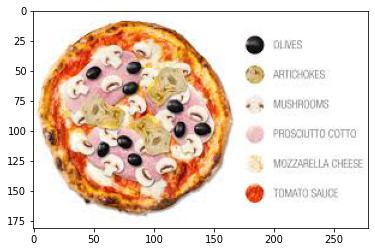

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/Food Classifier/Pizza/pizza1451.jpg"))

In [ ]:
a=plt.imread('/content/Food Classifier/Pizza/pizza1451.jpg')
a.shape

(181, 279, 3)

In [ ]:
import os

In [ ]:
labels = os.listdir('/content/Food Classifier')
labels

['Pizza', 'softdrink']

In [ ]:
# Dimension of our images.
img_width, img_height = 150, 150

#Setting up the directories
train_data_dir = '/content/Food Classifier'
#validation_data_dir ='/content/softdrink'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Setting up the batchsizes.
no_train_samples = 10452
no_validation_samples = 2070
epochs = 30
batch_size =32

In [ ]:
# this is the augmentation configuration we will use for training
'''
train_datagen = ImageDataGenerator(rescale=1./ 255,
                                   shear_range=0.2,
                                   vertical_flip=True, 
                                   rotation_range=30, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

#this generates batches of augment data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')'''

Found 0 images belonging to 0 classes.


In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

Found 7704 images belonging to 2 classes.


In [ ]:
# this is the augmentation configuration we will use for validating
#val_datagen = ImageDataGenerator(rescale=1./255)

#this generates batches of augment data for validating
'''validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')'''

Found 0 images belonging to 0 classes.


In [ ]:
# this is the augmentation configuration we will use for validating
val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1925 images belonging to 2 classes.


#Building Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'elu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3,3), activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3), activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3),  activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3), activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [ ]:
#configuring the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Model Training

In [ ]:
'''model.fit_generator(
    train_generator,
    steps_per_epoch=no_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=no_validation_samples // batch_size)'''

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
240/240 [==============================] - 97s 274ms/step - loss: 0.4917 - accuracy: 0.8170 - val_loss: 0.7631 - val_accuracy: 0.5813
Epoch 2/30
240/240 [==============================] - 65s 270ms/step - loss: 0.2727 - accuracy: 0.8921 - val_loss: 0.4232 - val_accuracy: 0.8146
Epoch 3/30
240/240 [==============================] - 64s 268ms/step - loss: 0.2495 - accuracy: 0.9063 - val_loss: 0.3045 - val_accuracy: 0.8849
Epoch 4/30
240/240 [==============================] - 65s 269ms/step - loss: 0.2299 - accuracy: 0.9102 - val_loss: 0.1934 - val_accuracy: 0.9286
Epoch 5/30
240/240 [==============================] - 64s 268ms/step - loss: 0.2187 - accuracy: 0.9235 - val_loss: 0.4364 - val_accuracy: 0.8443
Epoch 6/30
240/240 [==============================] - 64s 267ms/step - loss: 0.1950 - accuracy: 0.9225 - val_loss: 0.6867 - val_accuracy: 0.7682
Epoch 7/30
240/240 [==============================] - 64s 267ms/step - loss: 0.1978 - accuracy: 0.9253 - val_loss: 0.2514 - val_ac

#Saving the parameters for further deployment

In [ ]:
#to save the weights in the model as a HDF file
model.save_weights('food_classifier_first_try.h5')

In [ ]:
#to save the architecture of the model as a json file

with open('model_architecture_food_classifier.json','w') as f:
    f.write(model.to_json())

#Model Evaluation

In [ ]:
scoreSeg = model.evaluate_generator(validation_generator, 400)
print("Accuracy = ",scoreSeg[1]*100,'%')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy =  94.8051929473877 %


#Loading saved parameter for use

In [ ]:
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
# Model reconstruction from JSON file
with open('/content/model_architecture_food_classifier.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('/content/food_classifier_first_try.h5')

#Prediction Testing

In [ ]:
print(train_generator.class_indices)

{'Pizza': 0, 'softdrink': 1}


In [ ]:
#Here I took two random images from dataset and did test the prediction
import numpy as np
from keras.preprocessing import image  #image module helps to load image
test_image=image.load_img('/content/Food Classifier/Pizza/pizza1800.jpg',target_size=(150,150))
print(test_image.size)
test_image=image.img_to_array(test_image) #returns a 3D numpy array
print(test_image.shape)
test_image=np.expand_dims(test_image,axis=0) #CNN expects another dimension for the batch so we have to add that dimension at index=0 specified by axis=0 
print(test_image.shape)
result=model.predict(test_image)
print(result)
if result[0][0]==1.0:
  prediction='This is Softdrink'
else:
  prediction='This is Pizza'
print(prediction)

(150, 150)
(150, 150, 3)
(1, 150, 150, 3)
[[0.]]
This is Pizza


In [ ]:
test_image=image.load_img('/content/Food Classifier/softdrink/softdrink1800.jpg',target_size=(150,150))
print(test_image.size)
test_image=image.img_to_array(test_image) #returns a 3D numpy array
print(test_image.shape)
test_image=np.expand_dims(test_image,axis=0) #CNN expects another dimension for the batch so we have to add that dimension at index=0 specified by axis=0 
print(test_image.shape)
result=model.predict(test_image)
print(result)
if result[0][0]==1.0:
  prediction='This is Softdrink'
else:
  prediction='This is Pizza'
print(prediction)

(150, 150)
(150, 150, 3)
(1, 150, 150, 3)
[[1.]]
This is Softdrink
